<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#imports" data-toc-modified-id="imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>imports</a></span></li><li><span><a href="#data" data-toc-modified-id="data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>data</a></span></li><li><span><a href="#color-convert" data-toc-modified-id="color-convert-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>color convert</a></span></li><li><span><a href="#log-brightness-correction" data-toc-modified-id="log-brightness-correction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>log brightness correction</a></span></li><li><span><a href="#linear-correction" data-toc-modified-id="linear-correction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>linear correction</a></span></li></ul></div>

# imports

In [1]:
import cv2
import matplotlib.pyplot as plt
import skimage

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from skimage import io

# data


In [276]:
def show(image, title=None):
#     plt.figure(figsize=(image.shape[0] * 0.05, image.shape[1] * 0.05))
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.show()

In [277]:
sonet = io.imread('./sonet.jpg')

In [278]:
sonet.shape

(510L, 384L)

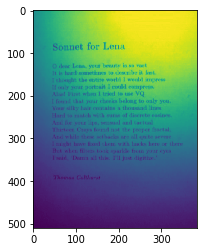

In [279]:
show(sonet)

# color convert

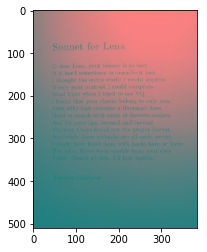

In [280]:
sonet2 = cv2.cvtColor(cv2.cvtColor(sonet, cv2.COLOR_GRAY2RGB), cv2.COLOR_RGB2YCrCb)
show(sonet2)

# log brightness correction

In [291]:
y = sonet2[:, :, 0].astype(float)
y_ = cv2.GaussianBlur(y, (105, 105), 0, 0)

In [292]:
y_corr = np.log(y / y_)
y_corr = (y_corr - y_corr.min()) / (y_corr.max() - y_corr.min()) * 255

In [293]:
im_corr = sonet2.copy()

im_corr[:, :, 0] = y_corr.astype(int)

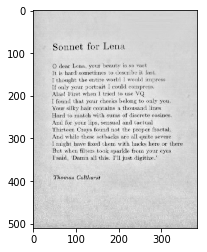

In [294]:
show(cv2.cvtColor(im_corr, cv2.COLOR_YCrCb2RGB))

# linear correction

In [302]:
y = sonet2[:, :, 0].astype(float)
y_ = cv2.GaussianBlur(y, (55, 55), 0, 0)

In [303]:
y_corr = y / y_
y_corr = (y_corr - y_corr.min()) / (y_corr.max() - y_corr.min()) * 255

In [304]:
im_corr = sonet2.copy()

im_corr[:, :, 0] = y_corr.astype(int)

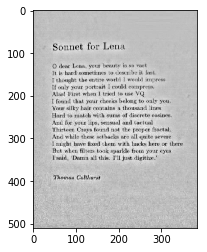

In [305]:
show(cv2.cvtColor(im_corr, cv2.COLOR_YCrCb2RGB))